In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv("api_key.env")

C:\Users\louis\Anaconda3\envs\mlenv\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


True

In [2]:
# Retrieve the News API key
api_key = os.getenv("news_api")

In [3]:
# Create the newsapi client
newsapi = NewsApiClient(api_key=api_key)

# Getting News Articles in English about Stocks

In [4]:
# Fetch news about the stocks in 2021 in English
stocks_news_en = newsapi.get_everything(
    q="stocks AND 2021",
    sort_by="relevancy",
    language="en"
)

# Show the total number of news
stocks_news_en["totalResults"]

18804

In [5]:
stocks_news_en

{'status': 'ok',
 'totalResults': 18804,
 'articles': [{'source': {'id': None, 'name': 'MarketBeat'},
   'author': 'Chris Markoch',
   'title': '3 Pet Stocks You’ll Love As Much As Your Furry Friends',
   'description': 'Pet ownership is up and so are the stocks of many pet stocks. This is making pet stocks one of the hottest sectors in the market. So let’s take a look at three pet stocks that investors should keep their eye on as we move into the second quarter of 2021.',
   'url': 'https://www.marketbeat.com/originals/3-pet-stocks-youll-love-as-much-as-your-furry-friends/?utm_source=entrepreneurcom&amp;amp;utm_medium=entrepreneurcom',
   'urlToImage': 'https://assets.entrepreneur.com/providers/marketbeat/hero-image-marketbeat-368514.jpeg',
   'publishedAt': '2021-04-02T13:30:00Z',
   'content': 'This story originally appeared on MarketBeatIt’s possible that the global pandemic has taken America’s love affair with our pets to new heights. Pet ownership is up and so are the stocks of m

In [6]:
# Transform the response dictionary to a DataFrame
stocks_df = pd.DataFrame.from_dict(stocks_news_en["articles"])

stocks_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'MarketBeat'}",Chris Markoch,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,https://www.marketbeat.com/originals/3-pet-sto...,https://assets.entrepreneur.com/providers/mark...,2021-04-02T13:30:00Z,This story originally appeared on MarketBeatIt...
1,"{'id': 'reuters', 'name': 'Reuters'}",None,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,https://www.reuters.com/article/us-usa-stocks-...,None,2021-03-22T11:18:23Z,FILE PHOTO: People are seen on Wall St. outsid...
2,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,https://www.reuters.com/article/us-europe-stoc...,https://static.reuters.com/resources/r/?m=02&d...,2021-03-10T08:28:00Z,By Reuters Staff\r\nFILE PHOTO: The German sha...
3,"{'id': 'reuters', 'name': 'Reuters'}",John Kemp,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,https://www.reuters.com/article/global-oil-kem...,https://s1.reutersmedia.net/resources_v2/image...,2021-03-12T01:00:00Z,(Repeats Thursdays column with no changes to t...
4,"{'id': 'reuters', 'name': 'Reuters'}",John Kemp,Column: Global oil inventories to become tight...,Global refineries will increase crude processi...,https://www.reuters.com/article/us-global-oil-...,https://static.reuters.com/resources/r/?m=02&d...,2021-03-11T14:57:00Z,LONDON (Reuters) - Global refineries will incr...


In [7]:
stocks_df.shape

(20, 8)

In [8]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "date": date,
                "title": title,
                "description": description,
                "text": text,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [9]:
# Creating a DataFrame with all the stocks news
stocks_news_df = create_df(stocks_news_en["articles"], "en")

In [10]:
# Looking into the DataFrame
stocks_news_df.head()

,date,title,description,text,language
0,2021-04-02T13:30:00Z,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,This story originally appeared on MarketBeatIt...,en
1,2021-03-22T11:18:23Z,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,FILE PHOTO: People are seen on Wall St. outsid...,en
2,2021-03-10T08:28:00Z,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,By Reuters Staff\r\nFILE PHOTO: The German sha...,en
3,2021-03-12T01:00:00Z,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,(Repeats Thursdays column with no changes to t...,en
4,2021-03-11T14:57:00Z,Column: Global oil inventories to become tight...,Global refineries will increase crude processi...,LONDON (Reuters) - Global refineries will incr...,en


In [11]:
stocks_news_df.shape

(20, 5)

In [12]:
file_path = Path("Resources/Stocks_News.csv")
stocks_news_df.to_csv(file_path)

# Vader Sentiment of Stocks News

In [13]:
# Imports
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
get_ipython().run_line_magic("matplotlib", "inline")

In [14]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Load news from csv file
file_path = Path("Resources/Stocks_News.csv")
news_df = pd.read_csv(file_path)
news_df.head()

,Unnamed: 0,date,title,description,text,language
0,0,2021-04-02T13:30:00Z,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,This story originally appeared on MarketBeatIt...,en
1,1,2021-03-22T11:18:23Z,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,FILE PHOTO: People are seen on Wall St. outsid...,en
2,2,2021-03-10T08:28:00Z,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,By Reuters Staff\r\nFILE PHOTO: The German sha...,en
3,3,2021-03-12T01:00:00Z,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,(Repeats Thursdays column with no changes to t...,en
4,4,2021-03-11T14:57:00Z,Column: Global oil inventories to become tight...,Global refineries will increase crude processi...,LONDON (Reuters) - Global refineries will incr...,en


In [16]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [17]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
news_sent_df = news_df.join(title_sentiment_df).join(text_sentiment_df)

news_sent_df.head()


,Unnamed: 0,date,title,description,text,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,0,2021-04-02T13:30:00Z,3 Pet Stocks You’ll Love As Much As Your Furry...,Pet ownership is up and so are the stocks of m...,This story originally appeared on MarketBeatIt...,en,0.8074,0.477,0.523,0.0,1,0.6369,0.107,0.893,0.000,1
1,1,2021-03-22T11:18:23Z,US STOCKS-Futures point to gains for tech-rela...,US STOCKS-Futures point to gains for tech-rela...,FILE PHOTO: People are seen on Wall St. outsid...,en,0.5994,0.308,0.692,0.0,1,0.0000,0.000,1.000,0.000,0
2,2,2021-03-10T08:28:00Z,"European shares slip as miners, travel stocks ...",European stocks pulled back on Wednesday after...,By Reuters Staff\r\nFILE PHOTO: The German sha...,en,0.2960,0.216,0.784,0.0,1,0.2960,0.064,0.936,0.000,1
3,3,2021-03-12T01:00:00Z,RPT-COLUMN-Global oil inventories to become ti...,Global refineries will increase crude processi...,(Repeats Thursdays column with no changes to t...,en,0.0000,0.000,1.000,0.0,0,-0.2960,0.000,0.932,0.068,-1
4,4,2021-03-11T14:57:00Z,Column: Global oil inventories to become tight...,Global refineries will increase crude processi...,LONDON (Reuters) - Global refineries will incr...,en,0.0000,0.000,1.000,0.0,0,-0.1531,0.115,0.782,0.103,-1


<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

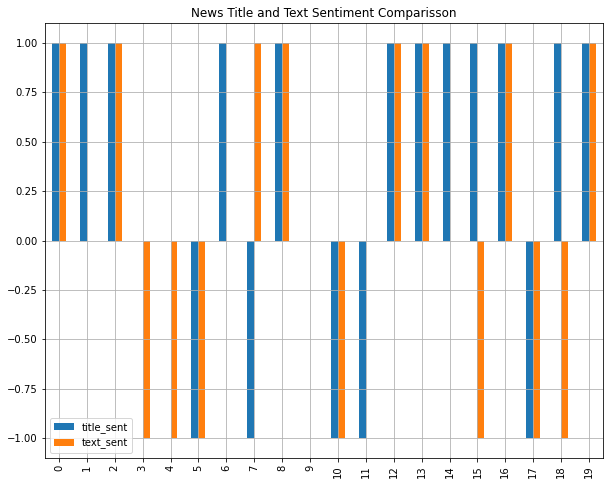

In [18]:
# Analyzing Sentiment Results via Plot
news_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [19]:
news_sent_df.describe()

,Unnamed: 0,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.50000,0.222430,0.197350,0.736850,0.065750,0.350000,0.121105,0.06950,0.890000,0.040550,0.050000
std,5.91608,0.430098,0.165589,0.151178,0.127883,0.875094,0.387270,0.06205,0.081917,0.053457,0.887041
min,0.00000,-0.612400,0.000000,0.505000,0.000000,-1.000000,-0.612400,0.00000,0.739000,0.000000,-1.000000
25%,4.75000,-0.025675,0.000000,0.635750,0.000000,-0.250000,-0.153100,0.00000,0.834250,0.000000,-1.000000
50%,9.50000,0.296000,0.216000,0.743500,0.000000,1.000000,0.000000,0.06500,0.892500,0.000000,0.000000
75%,14.25000,0.544875,0.278000,0.790250,0.034500,1.000000,0.502100,0.12250,0.937500,0.068000,1.000000
max,19.00000,0.807400,0.495000,1.000000,0.385000,1.000000,0.802000,0.17500,1.000000,0.147000,1.000000


In [20]:
file_path = Path("Resources/Stocks_News_Sentiment.csv")
news_sent_df.to_csv(file_path)

# Getting News about Tickers in 2021

In [21]:
# Fetch news about the tickers in 2021 in English
ticker_news_en = newsapi.get_everything(
    q="tickers AND 2021",
    sort_by="relevancy",
    language="en"
)

# Show the total number of news
ticker_news_en["totalResults"]

692

In [22]:
ticker_news_en

{'status': 'ok',
 'totalResults': 692,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'Jaqueline Ting Quesada',
   'title': 'Goldman Sachs says buy these 33 stocks now as profits rebound for companies that suffered the most during the pandemic',
   'description': 'Summary List PlacementFor more than one year, individuals, businesses, and financial markets have faced challenges brought about by the pandemic.\xa0\nOn March 11, 2020, the World Health Organization declared COVID-19 a pandemic, news that drove US stocks straigh…',
   'url': 'https://www.businessinsider.com/stock-picks-to-buy-with-best-profitability-growth-estimates-gs-2021-4',
   'urlToImage': 'https://i.insider.com/606758de856cd700198a2ec5?width=1200&format=jpeg',
   'publishedAt': '2021-04-04T10:30:00Z',
   'content': 'For more than one year, individuals, businesses, and financial markets have faced challenges brought about by the pandemic.\xa0\r\nOn March 11, 2020, the W

In [23]:
# Transform the response dictionary to a DataFrame
tickers_df = pd.DataFrame.from_dict(ticker_news_en["articles"])

tickers_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'business-insider', 'name': 'Business I...",Jaqueline Ting Quesada,Goldman Sachs says buy these 33 stocks now as ...,"Summary List PlacementFor more than one year, ...",https://www.businessinsider.com/stock-picks-to...,https://i.insider.com/606758de856cd700198a2ec5...,2021-04-04T10:30:00Z,"For more than one year, individuals, businesse..."
1,"{'id': 'business-insider', 'name': 'Business I...",Jaqueline Ting Quesada,Bank of America names 9 stocks to buy as the v...,Summary List PlacementPeople have been digesti...,https://www.businessinsider.com/stock-picks-to...,https://i.insider.com/6051fdd80347cb00184b6348...,2021-03-17T15:01:00Z,People have been digesting positive news regar...
2,"{'id': None, 'name': 'HYPEBEAST'}","info@hypebeast.com (HYPEBEAST), HYPEBEAST","A$AP Rocky, Tame Impala and More Announced for...","The three-day, annual Las Vegas music festival...",https://hypebeast.com/2021/3/life-is-beautiful...,https://image-cdn.hypb.st/https%3A%2F%2Fhypebe...,2021-03-11T09:15:09Z,"The three-day, annual Las Vegas music festival..."
3,"{'id': None, 'name': 'Theregister.com'}",Lindsay Clark,"You wouldn’t know my new database, she goes to...",Plus: Ellison ramps up SAP trash-talking. At l...,https://www.theregister.com/2021/03/11/oracle_...,https://regmedia.co.uk/2021/03/11/shutterstock...,2021-03-11T13:12:17Z,Updated Oracle has underwhelmed the market wit...
4,"{'id': None, 'name': 'Theregister.com'}",Lindsay Clark,"You wouldn’t know my new database, she goes to...",Plus: Ellison ramps up SAP trash-talking. At l...,https://www.theregister.com/2021/03/11/you_wou...,https://regmedia.co.uk/2021/03/11/shutterstock...,2021-03-11T13:12:17Z,Oracle has underwhelmed the market with its Q3...


In [24]:
tickers_df.shape

(20, 8)

In [25]:
# Create a DataFrame for Ticker articles
def make_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            article.append({
                "date": date,
                "title": title,
                "description": description,
                "text": text,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [26]:
# Look into ticker dataframe
ticker_df = make_df(ticker_news_en["articles"], "en")
ticker_df.head()

""


# Getting news about specific stocks in Date Range March 24, 2021 to April 3, 2021

In [27]:
# Fetch news about the TSLA stocks in 2021 in English
TSLA_news_en = newsapi.get_everything(
    q="TSLA",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
TSLA_news_en["totalResults"]

352

In [28]:
TSLA_news_en

{'status': 'ok',
 'totalResults': 352,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'Matthew Fox',
   'title': '2 reasons why buying a Tesla with bitcoin is a bad idea (TSLA)',
   'description': 'Summary List Placement<ul>\n<li>Tesla said earlier this week it will start accepting bitcoin as a form of payment for its products.</li>\n<li>The move comes after Tesla added $1.5 billion of bitcoin to its balance sheet in January.</li>\n<li>Detailed below are t…',
   'url': 'https://www.businessinsider.com/2-reasons-buying-tesla-with-bitcoin-bad-idea-2021-3',
   'urlToImage': 'https://i.insider.com/605cd979106eb50019d05a63?width=1200&format=jpeg',
   'publishedAt': '2021-03-25T19:52:24Z',
   'content': 'Tesla is now accepting bitcoin as a form of payment for its vehicles, making it one of the first companies to accept the cryptocurrency as a form of payment for its products.\r\nThe move came two month… [+2007 chars]'},
  {'source': {'id': '

In [29]:
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "date": date,
                "title": title,
                "description": description,
                "text": text,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [31]:
 # Creating a DataFrame with all the stocks news
TSLA_df = create_df(TSLA_news_en["articles"])
TSLA_df.head()

,date,title,description,text
0,2021-03-25T19:52:24Z,2 reasons why buying a Tesla with bitcoin is a...,Summary List Placement<ul>\n<li>Tesla said ear...,Tesla is now accepting bitcoin as a form of pa...
1,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ..."
2,2021-04-03T12:08:00Z,Elon Musk wants Tesla to be big in Texas. That...,Summary List PlacementElon Musk wants Tesla an...,Elon Musk wants Tesla and SpaceX to be big in ...
3,2021-03-26T17:57:49Z,Elon Musk deleted a tweet implying Tesla could...,Summary List PlacementTesla CEO Elon Musk dele...,Tesla CEO Elon Musk deleted a tweet on Friday ...
4,2021-03-31T13:57:00Z,Biden's infrastructure plan is a 'green tidal ...,Summary List PlacementPresident Biden's infras...,Drew Angerer/Getty Images\r\nPresident Biden's...


In [32]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [33]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TSLA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TSLA_sent_df = TSLA_df.join(title_sentiment_df).join(text_sentiment_df)

TSLA_sent_df.head()


,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-25T19:52:24Z,2 reasons why buying a Tesla with bitcoin is a...,Summary List Placement<ul>\n<li>Tesla said ear...,Tesla is now accepting bitcoin as a form of pa...,-0.5423,0.000,0.720,0.280,-1,0.6369,0.129,0.871,0.000,1
1,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ...",-0.2023,0.000,0.893,0.107,-1,0.6597,0.192,0.808,0.000,1
2,2021-04-03T12:08:00Z,Elon Musk wants Tesla to be big in Texas. That...,Summary List PlacementElon Musk wants Tesla an...,Elon Musk wants Tesla and SpaceX to be big in ...,-0.4767,0.000,0.829,0.171,-1,-0.2023,0.000,0.951,0.049,-1
3,2021-03-26T17:57:49Z,Elon Musk deleted a tweet implying Tesla could...,Summary List PlacementTesla CEO Elon Musk dele...,Tesla CEO Elon Musk deleted a tweet on Friday ...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
4,2021-03-31T13:57:00Z,Biden's infrastructure plan is a 'green tidal ...,Summary List PlacementPresident Biden's infras...,Drew Angerer/Getty Images\r\nPresident Biden's...,0.3400,0.103,0.897,0.000,1,0.4019,0.136,0.800,0.064,1


<AxesSubplot:title={'center':'TSLA Title and Text Sentiment Comparisson'}>

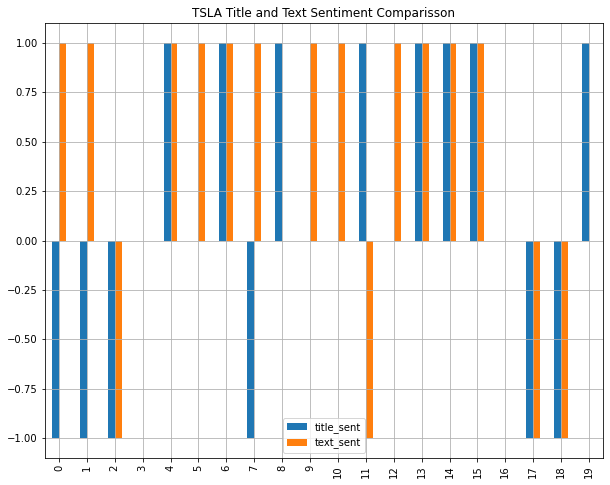

In [34]:
# Analyzing Sentiment Results via Plot
TSLA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TSLA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [35]:
TSLA_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.033925,0.08760,0.841000,0.071450,0.100000,0.174765,0.070000,0.895850,0.034100,0.400000
std,0.381611,0.11834,0.124099,0.105228,0.852242,0.396287,0.058751,0.066811,0.051123,0.820783
min,-0.659700,0.00000,0.667000,0.000000,-1.000000,-0.636900,0.000000,0.790000,0.000000,-1.000000
25%,-0.165400,0.00000,0.729000,0.000000,-1.000000,0.000000,0.000000,0.859250,0.000000,0.000000
50%,0.000000,0.00000,0.822000,0.000000,0.000000,0.305600,0.074000,0.897500,0.000000,1.000000
75%,0.323650,0.19600,1.000000,0.118000,1.000000,0.445000,0.104250,0.929250,0.052750,1.000000
max,0.585900,0.29700,1.000000,0.328000,1.000000,0.659700,0.192000,1.000000,0.172000,1.000000


In [36]:
# Fetch news about the AAPL stocks in 2021 in English
AAPL_news_en = newsapi.get_everything(
    q="AAPL",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
AAPL_news_en["totalResults"]

415

In [37]:
 # Creating a DataFrame with all the stocks news
AAPL_df = create_df(AAPL_news_en["articles"])
AAPL_df.head()

,date,title,description,text
0,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ..."
1,2021-03-30T14:36:23Z,Apple will host WWDC entirely online for the s...,Summary List PlacementApple will host WWDC ent...,Apple will host WWDC entirely online for the s...
2,2021-03-27T12:21:00Z,Apple will never deliver a car because it can'...,Summary List PlacementThe single biggest probl...,The single biggest problem with the Apple Car ...
3,2021-03-31T18:22:35Z,AAPL stock upgraded at UBS despite lack of iPh...,"Today, Apple was upgraded to a “buy” rating by...","Today, Apple was upgraded to a “buy” rating by..."
4,2021-03-31T14:41:15Z,"UBS upgrades AAPL to 'Buy,' raises price targe...","Investment bank UBS has upgraded AAPL to a ""Bu...","Investment bank UBS has upgraded AAPL to a ""Bu..."


In [38]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AAPL_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AAPL_sent_df = AAPL_df.join(title_sentiment_df).join(text_sentiment_df)

AAPL_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ...",-0.2023,0.000,0.893,0.107,-1,0.6597,0.192,0.808,0.000,1
1,2021-03-30T14:36:23Z,Apple will host WWDC entirely online for the s...,Summary List PlacementApple will host WWDC ent...,Apple will host WWDC entirely online for the s...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,2021-03-27T12:21:00Z,Apple will never deliver a car because it can'...,Summary List PlacementThe single biggest probl...,The single biggest problem with the Apple Car ...,0.0000,0.000,1.000,0.000,0,-0.7256,0.000,0.832,0.168,-1
3,2021-03-31T18:22:35Z,AAPL stock upgraded at UBS despite lack of iPh...,"Today, Apple was upgraded to a “buy” rating by...","Today, Apple was upgraded to a “buy” rating by...",0.2411,0.179,0.821,0.000,1,0.3400,0.064,0.936,0.000,1
4,2021-03-31T14:41:15Z,"UBS upgrades AAPL to 'Buy,' raises price targe...","Investment bank UBS has upgraded AAPL to a ""Bu...","Investment bank UBS has upgraded AAPL to a ""Bu...",0.4215,0.189,0.811,0.000,1,0.2960,0.059,0.941,0.000,1


<AxesSubplot:title={'center':'AAPL Title and Text Sentiment Comparisson'}>

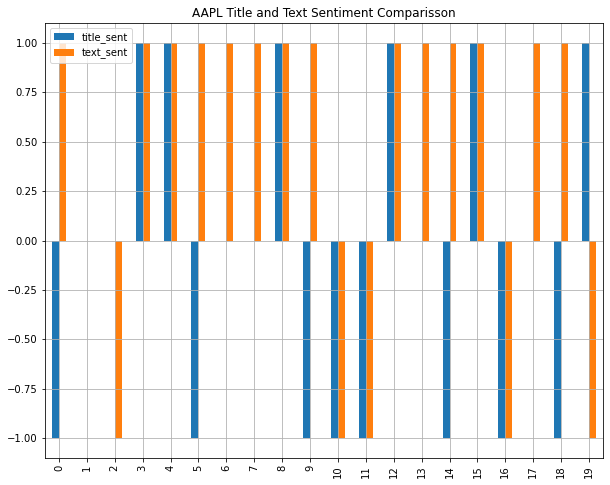

In [39]:
# Analyzing Sentiment Results via Plot
AAPL_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AAPL Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [40]:
AAPL_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.074430,0.064500,0.857550,0.07790,-0.100000,0.177550,0.083200,0.866750,0.050100,0.450000
std,0.346966,0.086434,0.116366,0.10303,0.852242,0.491238,0.066299,0.083383,0.075704,0.887041
min,-0.695600,0.000000,0.615000,0.00000,-1.000000,-0.840200,0.000000,0.711000,0.000000,-1.000000
25%,-0.289900,0.000000,0.796000,0.00000,-1.000000,-0.068300,0.053250,0.807500,0.000000,-0.250000
50%,0.000000,0.000000,0.841000,0.00000,0.000000,0.318000,0.068500,0.871500,0.000000,1.000000
75%,0.108475,0.128500,1.000000,0.18225,1.000000,0.557400,0.117750,0.937250,0.098500,1.000000
max,0.493900,0.244000,1.000000,0.27000,1.000000,0.810000,0.200000,1.000000,0.256000,1.000000


In [41]:
# Fetch news about the GME stocks in 2021 in English
GME_news_en = newsapi.get_everything(
    q="GME",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
GME_news_en["totalResults"]

224

In [42]:
 # Creating a DataFrame with all the stocks news
GME_df = create_df(GME_news_en["articles"])
GME_df.head()

,date,title,description,text
0,2021-03-30T14:37:08Z,GameStop just made its third hire from Amazon ...,Summary List PlacementYet another former Amazo...,Yet another former Amazon leader is joining Ga...
1,2021-03-26T17:21:51Z,GameStop is worth $16 and little has changed i...,"GameStop bulls are wearing ""rose-tinted glasse...",GameStop stock is still worth just $16 per sha...
2,2021-03-24T04:00:30Z,GameStop (GME) Q4 2020 Earnings Call Transcript,GME earnings call for the period ending Decemb...,Image source: The Motley Fool.\r\nGameStop (NY...
3,2021-04-01T18:31:00Z,: Reddit trading guru Keith Gill looks to have...,The man known as Roaring Kitty on social media...,"GameStop stock had a wild March, but this kitt..."
4,2021-03-27T07:00:00Z,The GameStop Saga Has Reached A New Chapter,"By Dan Duddy Published: March 27th, 2021",It seems like the story of GameStop's stock is...


In [43]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in GME_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
GME_sent_df = GME_df.join(title_sentiment_df).join(text_sentiment_df)

GME_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-30T14:37:08Z,GameStop just made its third hire from Amazon ...,Summary List PlacementYet another former Amazo...,Yet another former Amazon leader is joining Ga...,0.1779,0.078,0.922,0.0,1,0.5106,0.125,0.875,0.000,1
1,2021-03-26T17:21:51Z,GameStop is worth $16 and little has changed i...,"GameStop bulls are wearing ""rose-tinted glasse...",GameStop stock is still worth just $16 per sha...,0.2263,0.128,0.872,0.0,1,0.4767,0.108,0.892,0.000,1
2,2021-03-24T04:00:30Z,GameStop (GME) Q4 2020 Earnings Call Transcript,GME earnings call for the period ending Decemb...,Image source: The Motley Fool.\r\nGameStop (NY...,0.0000,0.000,1.000,0.0,0,-0.4404,0.000,0.884,0.116,-1
3,2021-04-01T18:31:00Z,: Reddit trading guru Keith Gill looks to have...,The man known as Roaring Kitty on social media...,"GameStop stock had a wild March, but this kitt...",0.0000,0.000,1.000,0.0,0,0.0000,0.000,1.000,0.000,0
4,2021-03-27T07:00:00Z,The GameStop Saga Has Reached A New Chapter,"By Dan Duddy Published: March 27th, 2021",It seems like the story of GameStop's stock is...,0.1027,0.189,0.811,0.0,1,0.6124,0.114,0.886,0.000,1


<AxesSubplot:title={'center':'GME Title and Text Sentiment Comparisson'}>

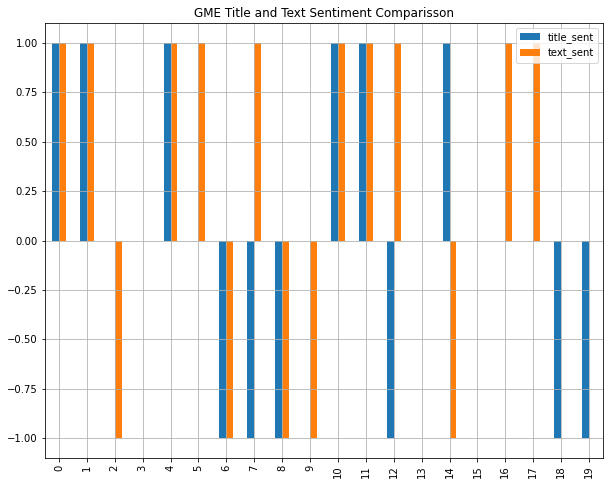

In [44]:
# Analyzing Sentiment Results via Plot
GME_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="GME Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [45]:
GME_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,-0.056955,0.051850,0.877500,0.070600,0.000000,0.157980,0.067850,0.903050,0.02915,0.250000
std,0.303354,0.076722,0.124363,0.116698,0.794719,0.391772,0.071296,0.070283,0.04070,0.850696
min,-0.624900,0.000000,0.588000,0.000000,-1.000000,-0.510600,0.000000,0.741000,0.00000,-1.000000
25%,-0.133600,0.000000,0.806750,0.000000,-1.000000,-0.057625,0.000000,0.869750,0.00000,-0.250000
50%,0.000000,0.000000,0.880000,0.000000,0.000000,0.101150,0.062000,0.910000,0.00000,0.500000
75%,0.115300,0.123500,1.000000,0.123000,1.000000,0.485175,0.109500,0.942000,0.06000,1.000000
max,0.421500,0.206000,1.000000,0.412000,1.000000,0.817600,0.259000,1.000000,0.11600,1.000000


In [46]:
# Fetch news about the VIAC stocks in 2021 in English
VIAC_news_en = newsapi.get_everything(
    q="VIAC",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
VIAC_news_en["totalResults"]

144

In [47]:
 # Creating a DataFrame with all the stocks news
VIAC_df = create_df(VIAC_news_en["articles"])
VIAC_df.head()

,date,title,description,text
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ..."
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...
4,2021-03-29T19:01:00Z,"Jim Cramer: The Game Isn't Rigged, There's No ...",Stay focused and look for opportunity....VIAC,"See, it was rigged all along. If that's your a..."


In [48]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in VIAC_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
VIAC_sent_df = VIAC_df.join(title_sentiment_df).join(text_sentiment_df)

VIAC_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...,0.0000,0.000,1.000,0.000,0,0.2960,0.068,0.932,0.000,1
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...,0.2023,0.114,0.886,0.000,1,0.0000,0.000,1.000,0.000,0
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ...",0.0000,0.000,1.000,0.000,0,0.3400,0.070,0.930,0.000,1
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...,-0.3818,0.096,0.688,0.216,-1,0.6486,0.200,0.734,0.066,1
4,2021-03-29T19:01:00Z,"Jim Cramer: The Game Isn't Rigged, There's No ...",Stay focused and look for opportunity....VIAC,"See, it was rigged all along. If that's your a...",-0.1032,0.278,0.486,0.236,-1,-0.6486,0.000,0.858,0.142,-1


<AxesSubplot:title={'center':'VIAC Title and Text Sentiment Comparisson'}>

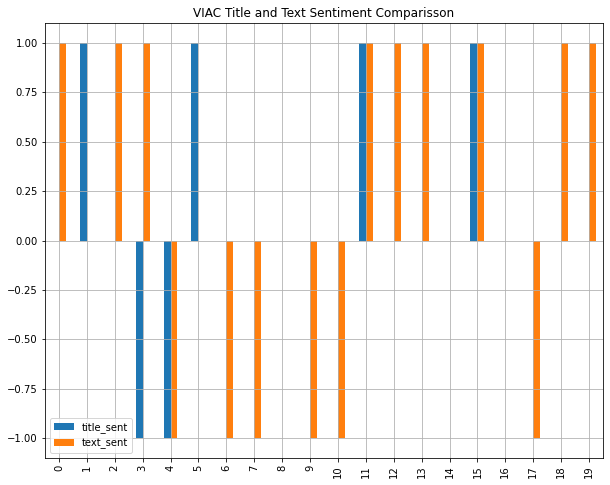

In [49]:
# Analyzing Sentiment Results via Plot
VIAC_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="VIAC Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [50]:
VIAC_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.074030,0.070700,0.902050,0.027250,0.100000,0.086680,0.077150,0.871950,0.050800,0.150000
std,0.261971,0.136898,0.176978,0.071137,0.552506,0.472177,0.074296,0.096444,0.068591,0.875094
min,-0.381800,0.000000,0.482000,0.000000,-1.000000,-0.757900,0.000000,0.711000,0.000000,-1.000000
25%,0.000000,0.000000,0.876000,0.000000,0.000000,-0.139525,0.000000,0.804000,0.000000,-1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.066000,0.855000,0.000000,0.000000
75%,0.000000,0.100500,1.000000,0.000000,0.000000,0.440775,0.144500,0.952000,0.111750,1.000000
max,0.822500,0.518000,1.000000,0.236000,1.000000,0.757900,0.231000,1.000000,0.178000,1.000000


In [51]:
# Fetch news about the BA stocks in 2021 in English
BA_news_en = newsapi.get_everything(
    q="BA",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
BA_news_en["totalResults"]

652

In [52]:
 # Creating a DataFrame with all the stocks news
BA_df = create_df(BA_news_en["articles"])
BA_df.head()

,date,title,description,text
0,2021-03-24T10:22:00Z,Breakingviews - Capital Calls - BA owner reach...,Breakingviews - Capital Calls - BA owner reach...,By Reuters Staff\r\nBritish Airways Airbus A38...
1,2021-03-25T10:06:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...
2,2021-03-25T10:23:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...
3,2021-03-26T01:43:01Z,There's a massive ship stuck in the Suez Canal...,The massive container ship lodged in the Suez ...,The massive container ship lodged in the Suez ...
4,2021-03-30T06:03:00Z,"Dr. Q, the farmer who became one of the best n...",In recent days Brad Pitt announced that he wil...,"March\r\n30, 2021\r\n6 min read\r\nThis articl..."


In [53]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in BA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
BA_sent_df = BA_df.join(title_sentiment_df).join(text_sentiment_df)

BA_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-24T10:22:00Z,Breakingviews - Capital Calls - BA owner reach...,Breakingviews - Capital Calls - BA owner reach...,By Reuters Staff\r\nBritish Airways Airbus A38...,0.0516,0.118,0.882,0.000,1,0.0000,0.0,1.000,0.000,0
1,2021-03-25T10:06:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...,0.0000,0.000,1.000,0.000,0,-0.8591,0.0,0.771,0.229,-1
2,2021-03-25T10:23:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...,0.0000,0.000,1.000,0.000,0,-0.8591,0.0,0.759,0.241,-1
3,2021-03-26T01:43:01Z,There's a massive ship stuck in the Suez Canal...,The massive container ship lodged in the Suez ...,The massive container ship lodged in the Suez ...,-0.1280,0.000,0.897,0.103,-1,0.0000,0.0,1.000,0.000,0
4,2021-03-30T06:03:00Z,"Dr. Q, the farmer who became one of the best n...",In recent days Brad Pitt announced that he wil...,"March\r\n30, 2021\r\n6 min read\r\nThis articl...",0.6369,0.244,0.756,0.000,1,-0.3400,0.0,0.928,0.072,-1


<AxesSubplot:title={'center':'BA Title and Text Sentiment Comparisson'}>

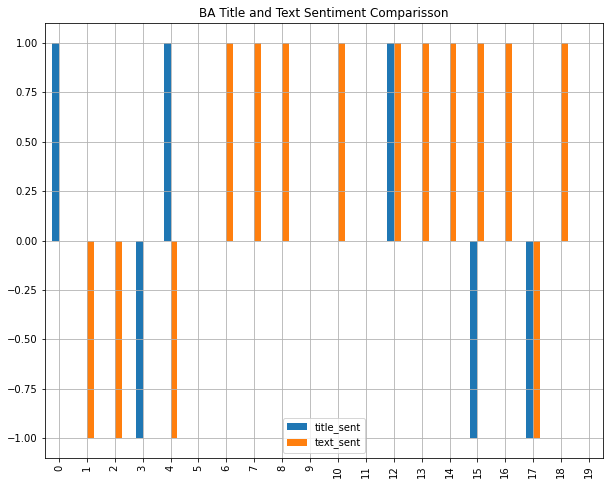

In [75]:
# Analyzing Sentiment Results via Plot
BA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [54]:
BA_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.031950,0.028850,0.950600,0.020550,0.000000,0.110375,0.058800,0.902000,0.039150,0.300000
std,0.222905,0.073642,0.084215,0.054011,0.561951,0.481807,0.074618,0.090039,0.075233,0.801315
min,-0.273200,0.000000,0.756000,0.000000,-1.000000,-0.859100,0.000000,0.725000,0.000000,-1.000000
25%,0.000000,0.000000,0.899250,0.000000,0.000000,0.000000,0.000000,0.867000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.050500,0.031000,0.919000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.475775,0.091750,1.000000,0.057250,1.000000
max,0.636900,0.244000,1.000000,0.208000,1.000000,0.827100,0.237000,1.000000,0.241000,1.000000


In [55]:
# Fetch news about the BIDU stocks in 2021 in English
BIDU_news_en = newsapi.get_everything(
    q="BIDU",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
BIDU_news_en["totalResults"]

107

In [56]:
 # Creating a DataFrame with all the stocks news
BIDU_df = create_df(BIDU_news_en["articles"])
BIDU_df.head()

,date,title,description,text
0,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...
1,2021-03-29T11:07:07Z,Chinese Tech Stocks Sell Off after 'Missed' Ar...,"Nomura, Credit Suisse warn profits will take a...",Chinese tech stocks sold off on Monday due to ...
2,2021-03-25T10:07:00Z,More pressure for Chinese tech stocks as SEC r...,Dual-listed Chinese companies are extending lo...,<ul><li>Dual-listed Chinese companies are exte...
3,2021-03-26T20:53:43Z,"5 Top Stock Trades for Monday: ARKK, SKLZ, FUB...",It’s been a weird and choppy week. FAANG stock...,Despite some warning signs that the market may...
4,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...


In [57]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in BIDU_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
BIDU_sent_df = BIDU_df.join(title_sentiment_df).join(text_sentiment_df)

BIDU_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...,-0.1027,0.186,0.593,0.220,-1,-0.0258,0.070,0.858,0.072,0
1,2021-03-29T11:07:07Z,Chinese Tech Stocks Sell Off after 'Missed' Ar...,"Nomura, Credit Suisse warn profits will take a...",Chinese tech stocks sold off on Monday due to ...,0.0000,0.000,1.000,0.000,0,-0.4404,0.000,0.917,0.083,-1
2,2021-03-25T10:07:00Z,More pressure for Chinese tech stocks as SEC r...,Dual-listed Chinese companies are extending lo...,<ul><li>Dual-listed Chinese companies are exte...,-0.3597,0.000,0.839,0.161,-1,-0.1280,0.074,0.836,0.090,-1
3,2021-03-26T20:53:43Z,"5 Top Stock Trades for Monday: ARKK, SKLZ, FUB...",It’s been a weird and choppy week. FAANG stock...,Despite some warning signs that the market may...,0.2023,0.167,0.833,0.000,1,0.3200,0.125,0.809,0.066,1
4,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...,0.0000,0.000,1.000,0.000,0,-0.5267,0.000,0.868,0.132,-1


<AxesSubplot:title={'center':'BIDU Title and Text Sentiment Comparisson'}>

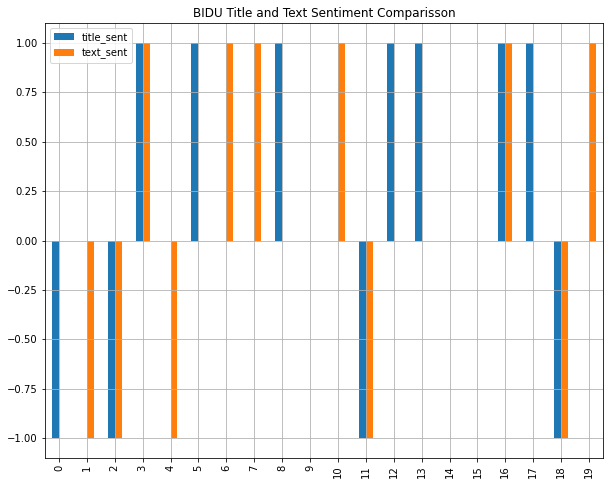

In [76]:
# Analyzing Sentiment Results via Plot
BIDU_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BIDU Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [58]:
BIDU_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.040045,0.072050,0.878000,0.049900,0.15000,0.060980,0.046200,0.922500,0.031300,0.050000
std,0.247803,0.093487,0.129596,0.094942,0.74516,0.320288,0.052396,0.071748,0.045369,0.759155
min,-0.493900,0.000000,0.593000,0.000000,-1.00000,-0.526700,0.000000,0.809000,0.000000,-1.000000
25%,0.000000,0.000000,0.805250,0.000000,0.00000,-0.051350,0.000000,0.860250,0.000000,-0.250000
50%,0.000000,0.000000,0.862000,0.000000,0.00000,0.000000,0.027500,0.921000,0.000000,0.000000
75%,0.208300,0.161750,1.000000,0.029500,1.00000,0.284900,0.074250,1.000000,0.074750,1.000000
max,0.381800,0.245000,1.000000,0.314000,1.00000,0.680800,0.139000,1.000000,0.132000,1.000000


In [59]:
# Fetch news about the AMZN stocks in 2021 in English
AMZN_news_en = newsapi.get_everything(
    q="AMZN",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
AMZN_news_en["totalResults"]

521

In [60]:
 # Creating a DataFrame with all the stocks news
AMZN_df = create_df(AMZN_news_en["articles"])
AMZN_df.head()

,date,title,description,text
0,2021-03-31T18:25:26Z,Amazon says its 'office-centric' model is here...,Summary List PlacementAmazon plans start bring...,Amazon plans start bringing employees back to ...
1,2021-03-27T12:40:00Z,The new CEO of Amazon's $51 billion cloud busi...,"Summary List PlacementBy all accounts, Adam Se...","By all accounts, Adam Selipsky is going to inh..."
2,2021-03-29T05:00:00Z,Do Kohl’s Shares Have More Room to Run?,Kohl’s (NYSE: KSS) shares languished for much ...,This story originally appeared on MarketBeatKo...
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...
4,2021-03-31T22:00:00Z,: Google settles with labor board in win for n...,Alphabet must let workers at data center in So...,Google must allow workers at one of its data c...


In [61]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AMZN_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AMZN_sent_df = AMZN_df.join(title_sentiment_df).join(text_sentiment_df)

AMZN_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-31T18:25:26Z,Amazon says its 'office-centric' model is here...,Summary List PlacementAmazon plans start bring...,Amazon plans start bringing employees back to ...,0.1779,0.082,0.918,0.000,1,0.3400,0.091,0.909,0.000,1
1,2021-03-27T12:40:00Z,The new CEO of Amazon's $51 billion cloud busi...,"Summary List PlacementBy all accounts, Adam Se...","By all accounts, Adam Selipsky is going to inh...",0.0762,0.061,0.939,0.000,1,0.1779,0.044,0.956,0.000,1
2,2021-03-29T05:00:00Z,Do Kohl’s Shares Have More Room to Run?,Kohl’s (NYSE: KSS) shares languished for much ...,This story originally appeared on MarketBeatKo...,0.2960,0.239,0.761,0.000,1,0.2960,0.073,0.927,0.000,1
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...,-0.3818,0.096,0.688,0.216,-1,0.6486,0.200,0.734,0.066,1
4,2021-03-31T22:00:00Z,: Google settles with labor board in win for n...,Alphabet must let workers at data center in So...,Google must allow workers at one of its data c...,0.5859,0.297,0.703,0.000,1,0.2263,0.085,0.879,0.036,1


<AxesSubplot:title={'center':'AMZN Title and Text Sentiment Comparisson'}>

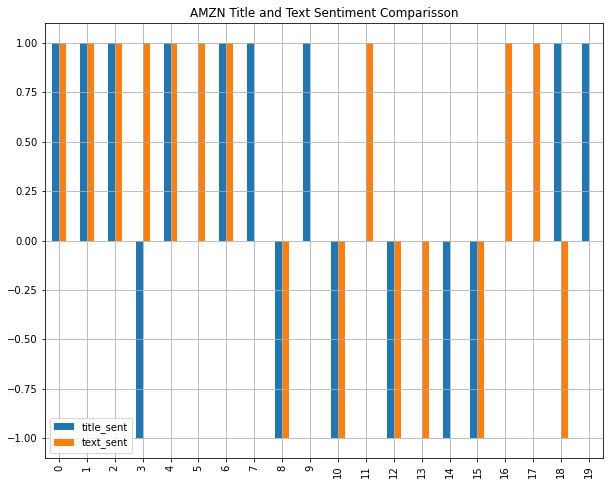

In [77]:
# Analyzing Sentiment Results via Plot
AMZN_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AMZN Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [62]:
AMZN_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.016150,0.090050,0.843800,0.066150,0.150000,0.083895,0.063250,0.890300,0.046500,0.200000
std,0.348166,0.099964,0.130086,0.097761,0.875094,0.419261,0.057807,0.080371,0.070298,0.894427
min,-0.694600,0.000000,0.513000,0.000000,-1.000000,-0.840200,0.000000,0.734000,0.000000,-1.000000
25%,-0.156575,0.000000,0.759000,0.000000,-1.000000,-0.144050,0.000000,0.844250,0.000000,-1.000000
50%,0.000000,0.071500,0.850000,0.000000,0.000000,0.101850,0.068500,0.921500,0.000000,0.500000
75%,0.207425,0.143250,0.954250,0.148250,1.000000,0.355475,0.086500,0.936750,0.066000,1.000000
max,0.585900,0.297000,1.000000,0.269000,1.000000,0.717800,0.200000,1.000000,0.256000,1.000000


In [63]:
# Fetch news about the NIO stocks in 2021 in English
NIO_news_en = newsapi.get_everything(
    q="NIO",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
NIO_news_en["totalResults"]

353

In [64]:
 # Creating a DataFrame with all the stocks news
NIO_df = create_df(NIO_news_en["articles"])
NIO_df.head()

,date,title,description,text
0,2021-03-26T11:30:00Z,Electric Car Company Nio Shuts Down Temporaril...,China’s electric car startup Nio will shut dow...,Chinas electric car startup Nio will shut down...
1,2021-03-26T08:42:55Z,Nio to temporarily suspend production due to c...,Chinese electric vehicle (EV) maker Nio Inc sa...,By Reuters Staff\r\nMarch 26 (Reuters) - Chine...
2,2021-03-24T03:16:38Z,China's biggest car brand launches rival to Tesla,Geely's new premium electric car brand Zeekr c...,image copyrightGetty Images\r\nimage captionTh...
3,2021-03-26T20:35:52Z,US STOCKS-Wall Street rallies on strong recove...,"* Indexes rally: Dow 1.39%, S&P 1.66%, Nasdaq ...",* Rotation into value stocks lifts S&amp;P 500...
4,2021-03-26T11:13:14Z,"US STOCKS-Futures rise as bank, energy stocks ...",U.S. stock index futures edged higher on Frida...,FILE PHOTO: The hand of a sculpture of former ...


In [65]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in NIO_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
NIO_sent_df = NIO_df.join(title_sentiment_df).join(text_sentiment_df)

NIO_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-26T11:30:00Z,Electric Car Company Nio Shuts Down Temporaril...,China’s electric car startup Nio will shut dow...,Chinas electric car startup Nio will shut down...,-0.2500,0.000,0.857,0.143,-1,-0.2500,0.000,0.946,0.054,-1
1,2021-03-26T08:42:55Z,Nio to temporarily suspend production due to c...,Chinese electric vehicle (EV) maker Nio Inc sa...,By Reuters Staff\r\nMarch 26 (Reuters) - Chine...,-0.5106,0.000,0.650,0.350,-1,-0.2500,0.000,0.944,0.056,-1
2,2021-03-24T03:16:38Z,China's biggest car brand launches rival to Tesla,Geely's new premium electric car brand Zeekr c...,image copyrightGetty Images\r\nimage captionTh...,0.0000,0.000,1.000,0.000,0,0.2263,0.086,0.856,0.058,1
3,2021-03-26T20:35:52Z,US STOCKS-Wall Street rallies on strong recove...,"* Indexes rally: Dow 1.39%, S&P 1.66%, Nasdaq ...",* Rotation into value stocks lifts S&amp;P 500...,0.7269,0.466,0.534,0.000,1,0.6249,0.150,0.850,0.000,1
4,2021-03-26T11:13:14Z,"US STOCKS-Futures rise as bank, energy stocks ...",U.S. stock index futures edged higher on Frida...,FILE PHOTO: The hand of a sculpture of former ...,0.8074,0.480,0.520,0.000,1,0.4939,0.084,0.916,0.000,1


<AxesSubplot:title={'center':'NIO Title and Text Sentiment Comparisson'}>

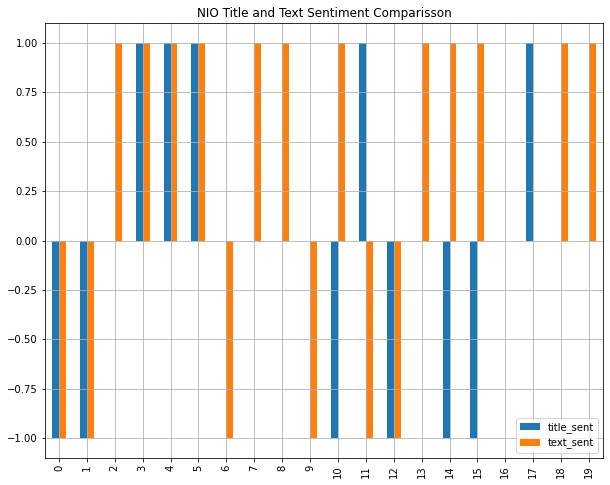

In [78]:
# Analyzing Sentiment Results via Plot
NIO_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="NIO Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [66]:
NIO_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.036380,0.090750,0.849050,0.060200,-0.050000,0.098965,0.068400,0.881000,0.050650,0.300000
std,0.375483,0.155519,0.165976,0.105586,0.759155,0.463409,0.069137,0.069669,0.065498,0.923381
min,-0.695600,0.000000,0.520000,0.000000,-1.000000,-0.859100,0.000000,0.753000,0.000000,-1.000000
25%,-0.159850,0.000000,0.766500,0.000000,-1.000000,-0.177325,0.000000,0.844250,0.000000,-1.000000
50%,0.000000,0.000000,0.862500,0.000000,0.000000,0.140550,0.073000,0.868000,0.052500,1.000000
75%,0.090300,0.150500,1.000000,0.091250,0.250000,0.394375,0.107000,0.936500,0.062000,1.000000
max,0.807400,0.480000,1.000000,0.350000,1.000000,0.796400,0.231000,1.000000,0.247000,1.000000


In [67]:
# Fetch news about the DISCA stocks in 2021 in English
DISCA_news_en = newsapi.get_everything(
    q="DISCA",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
DISCA_news_en["totalResults"]

84

In [68]:
 # Creating a DataFrame with all the stocks news
DISCA_df = create_df(DISCA_news_en["articles"])
DISCA_df.head()

,date,title,description,text
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ..."
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...
4,2021-03-30T16:55:00Z,: ‘This has to be one of the single greatest l...,Wall Street on Tuesday may be seeing muted act...,Wall Street on Tuesday may be seeing muted act...


In [69]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in DISCA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
DISCA_sent_df = DISCA_df.join(title_sentiment_df).join(text_sentiment_df)

DISCA_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...,0.0000,0.000,1.000,0.000,0,0.2960,0.068,0.932,0.000,1
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...,0.2023,0.114,0.886,0.000,1,0.0000,0.000,1.000,0.000,0
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ...",0.0000,0.000,1.000,0.000,0,0.3400,0.070,0.930,0.000,1
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...,-0.3818,0.096,0.688,0.216,-1,0.6486,0.200,0.734,0.066,1
4,2021-03-30T16:55:00Z,: ‘This has to be one of the single greatest l...,Wall Street on Tuesday may be seeing muted act...,Wall Street on Tuesday may be seeing muted act...,0.6908,0.254,0.653,0.093,1,0.0000,0.000,1.000,0.000,0


<AxesSubplot:title={'center':'DISCA Title and Text Sentiment Comparisson'}>

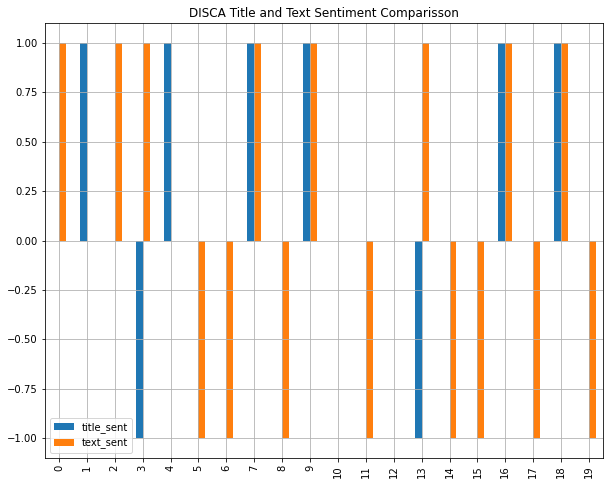

In [79]:
# Analyzing Sentiment Results via Plot
DISCA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="DISCA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [70]:
DISCA_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.056295,0.076400,0.885650,0.037950,0.200000,-0.032470,0.059100,0.874750,0.066150,0.000000
std,0.241098,0.106049,0.174737,0.109785,0.615587,0.493425,0.066474,0.091454,0.082578,0.917663
min,-0.440400,0.000000,0.367000,0.000000,-1.000000,-0.778300,0.000000,0.711000,0.000000,-1.000000
25%,0.000000,0.000000,0.812250,0.000000,0.000000,-0.532575,0.000000,0.812000,0.000000,-1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.056000,0.857000,0.000000,0.000000
75%,0.165400,0.157250,1.000000,0.000000,1.000000,0.340000,0.088000,0.933750,0.152500,1.000000
max,0.690800,0.310000,1.000000,0.450000,1.000000,0.648600,0.200000,1.000000,0.217000,1.000000


In [71]:
# Fetch news about the TME stocks in 2021 in English
TME_news_en = newsapi.get_everything(
    q="TME",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
TME_news_en["totalResults"]

102

In [72]:
 # Creating a DataFrame with all the stocks news
TME_df = create_df(TME_news_en["articles"])
TME_df.head()

,date,title,description,text
0,2021-03-29T03:07:00Z,: Tencent Music announces $1 billion share-buy...,The move comes days after the U.S. Securities ...,Tencent Music Entertainment Group announced Su...
1,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...
2,2021-04-03T11:38:40Z,Tencent Music: The Ultimate Winner Of China's ...,Tencent Music’s stock is expensive but justifi...,Photo by Spencer Platt/Getty Images News via G...
3,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...
4,2021-04-01T16:43:37Z,Should You Invest in Tencent Music Entertainme...,"Harding Loevner, an investment management firm...","He had just finished grocery shopping, but a N..."


In [73]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TME_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TME_sent_df = TME_df.join(title_sentiment_df).join(text_sentiment_df)

TME_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-29T03:07:00Z,: Tencent Music announces $1 billion share-buy...,The move comes days after the U.S. Securities ...,Tencent Music Entertainment Group announced Su...,0.0000,0.000,1.000,0.00,0,0.4215,0.085,0.915,0.000,1
1,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...,-0.1027,0.186,0.593,0.22,-1,-0.0258,0.070,0.858,0.072,0
2,2021-04-03T11:38:40Z,Tencent Music: The Ultimate Winner Of China's ...,Tencent Music’s stock is expensive but justifi...,Photo by Spencer Platt/Getty Images News via G...,0.5859,0.297,0.703,0.00,1,0.7096,0.204,0.796,0.000,1
3,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...,0.0000,0.000,1.000,0.00,0,-0.5267,0.000,0.868,0.132,-1
4,2021-04-01T16:43:37Z,Should You Invest in Tencent Music Entertainme...,"Harding Loevner, an investment management firm...","He had just finished grocery shopping, but a N...",0.4215,0.286,0.714,0.00,1,0.0000,0.000,1.000,0.000,0


<AxesSubplot:title={'center':'TME Title and Text Sentiment Comparisson'}>

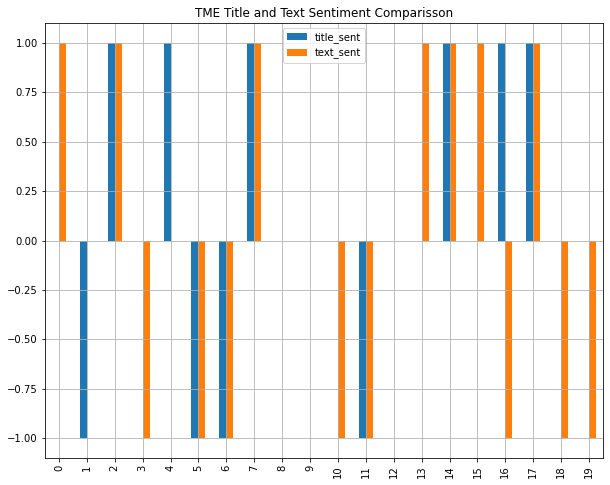

In [80]:
# Analyzing Sentiment Results via Plot
TME_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TME Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [74]:
TME_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.048360,0.092600,0.844850,0.062500,0.100000,-0.076230,0.076650,0.824650,0.098600,-0.050000
std,0.393935,0.142032,0.178739,0.140088,0.718185,0.620973,0.101485,0.118858,0.119591,0.887041
min,-0.659700,0.000000,0.476000,0.000000,-1.000000,-0.909300,0.000000,0.570000,0.000000,-1.000000
25%,0.000000,0.000000,0.711250,0.000000,0.000000,-0.689350,0.000000,0.773000,0.000000,-1.000000
50%,0.000000,0.000000,0.941000,0.000000,0.000000,0.000000,0.061500,0.852500,0.073500,0.000000
75%,0.340000,0.188000,1.000000,0.000000,1.000000,0.421500,0.091500,0.905250,0.146750,1.000000
max,0.680800,0.412000,1.000000,0.524000,1.000000,0.964600,0.367000,1.000000,0.333000,1.000000


# Getting news about specific stocks in Date Range March 15, 2021 to March 23, 2021

In [81]:
# Fetch news about the TSLA stocks in 2021 in English
TSLA_news_en = newsapi.get_everything(
    q="TSLA",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
TSLA_news_en["totalResults"]

310

In [82]:
 # Creating a DataFrame with all the stocks news
TSLA_df = create_df(TSLA_news_en["articles"])
TSLA_df.head()

,date,title,description,text
0,2021-03-23T16:33:18Z,The US consumer safety regulator is investigat...,Summary List PlacementThe US Consumer Product ...,The US Consumer Product Safety Commission is l...
1,2021-03-17T13:27:02Z,Elon Musk reverses course on selling NFT song ...,<ol><li>Elon Musk reverses course on selling N...,Billionaire Elon Musk reversed course on Tuesd...
2,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...
3,2021-03-20T11:04:00Z,'Technoking' and 'Master of Coin' — Elon Musk'...,Summary List PlacementMarketing is one of the ...,Marketing is one of the most expensive things ...
4,2021-03-15T19:07:36Z,Is Volkswagen a Good Electric Vehicle Stock to...,The company's active interest in the electric ...,"March\r\n15, 2021\r\n4 min read\r\nThis story ..."


In [83]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TSLA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TSLA_sent_df = TSLA_df.join(title_sentiment_df).join(text_sentiment_df)

TSLA_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-23T16:33:18Z,The US consumer safety regulator is investigat...,Summary List PlacementThe US Consumer Product ...,The US Consumer Product Safety Commission is l...,0.5423,0.220,0.780,0.000,1,0.6486,0.181,0.749,0.070,1
1,2021-03-17T13:27:02Z,Elon Musk reverses course on selling NFT song ...,<ol><li>Elon Musk reverses course on selling N...,Billionaire Elon Musk reversed course on Tuesd...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...,-0.3400,0.000,0.888,0.112,-1,0.0000,0.000,1.000,0.000,0
3,2021-03-20T11:04:00Z,'Technoking' and 'Master of Coin' — Elon Musk'...,Summary List PlacementMarketing is one of the ...,Marketing is one of the most expensive things ...,0.0762,0.056,0.944,0.000,1,-0.2500,0.000,0.943,0.057,-1
4,2021-03-15T19:07:36Z,Is Volkswagen a Good Electric Vehicle Stock to...,The company's active interest in the electric ...,"March\r\n15, 2021\r\n4 min read\r\nThis story ...",0.4404,0.293,0.707,0.000,1,0.5859,0.134,0.866,0.000,1


<AxesSubplot:title={'center':'TSLA Title and Text Sentiment Comparisson'}>

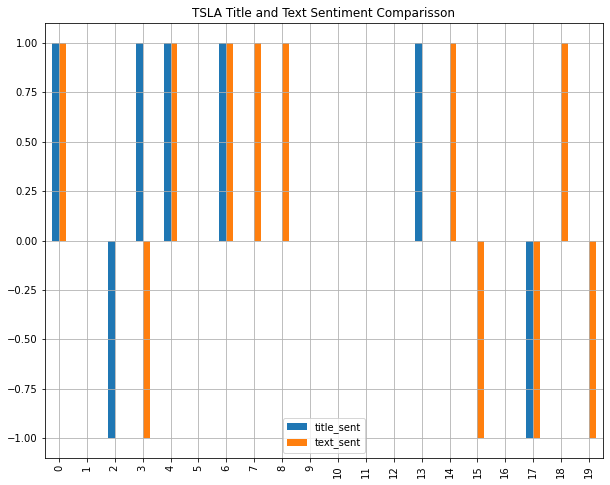

In [84]:
# Analyzing Sentiment Results via Plot
TSLA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TSLA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [85]:
TSLA_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.00000
mean,0.054005,0.045350,0.941400,0.013250,0.150000,0.075770,0.04285,0.932850,0.02435,0.15000
std,0.200451,0.089996,0.092421,0.041321,0.587143,0.304405,0.05840,0.082014,0.03980,0.74516
min,-0.340000,0.000000,0.707000,0.000000,-1.000000,-0.526700,0.00000,0.749000,0.00000,-1.00000
25%,0.000000,0.000000,0.877750,0.000000,0.000000,0.000000,0.00000,0.873500,0.00000,0.00000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.948500,0.00000,0.00000
75%,0.019050,0.014000,1.000000,0.000000,0.250000,0.225725,0.06625,1.000000,0.05775,1.00000
max,0.542300,0.293000,1.000000,0.153000,1.000000,0.648600,0.18100,1.000000,0.11100,1.00000


In [86]:
# Fetch news about the AAPL stocks in 2021 in English
AAPL_news_en = newsapi.get_everything(
    q="AAPL",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
AAPL_news_en["totalResults"]

320

In [87]:
 # Creating a DataFrame with all the stocks news
AAPL_df = create_df(AAPL_news_en["articles"])
AAPL_df.head()

,date,title,description,text
0,2021-03-16T15:28:43Z,Apple faces a major test of how it enforces it...,Summary List PlacementApple could soon face a ...,Apple could soon face a major test of how stri...
1,2021-03-16T16:41:44Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ..."
2,2021-03-16T16:41:00Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ..."
3,2021-03-16T17:07:00Z,The Wall Street Journal: Google to cut commiss...,Alphabet Inc.'s Google is reducing the commiss...,"Alphabet Inc.s \r\n GOOG,\r\n +1.32%\r\nGoogle..."
4,2021-03-18T15:49:00Z,: This may be the best predictor of how likely...,"The redder the state, the more its residents a...","The redder the state, the more its residents a..."


In [88]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AAPL_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AAPL_sent_df = AAPL_df.join(title_sentiment_df).join(text_sentiment_df)

AAPL_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-16T15:28:43Z,Apple faces a major test of how it enforces it...,Summary List PlacementApple could soon face a ...,Apple could soon face a major test of how stri...,0.0000,0.000,1.000,0.000,0,0.3182,0.063,0.937,0.000,1
1,2021-03-16T16:41:44Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ...",0.3612,0.294,0.706,0.000,1,0.2960,0.062,0.937,0.000,1
2,2021-03-16T16:41:00Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ...",0.3612,0.294,0.706,0.000,1,0.2960,0.062,0.937,0.000,1
3,2021-03-16T17:07:00Z,The Wall Street Journal: Google to cut commiss...,Alphabet Inc.'s Google is reducing the commiss...,"Alphabet Inc.s \r\n GOOG,\r\n +1.32%\r\nGoogle...",-0.6597,0.000,0.670,0.330,-1,0.3400,0.130,0.809,0.061,1
4,2021-03-18T15:49:00Z,: This may be the best predictor of how likely...,"The redder the state, the more its residents a...","The redder the state, the more its residents a...",0.6124,0.206,0.735,0.059,1,-0.3400,0.000,0.938,0.062,-1


<AxesSubplot:title={'center':'AAPL Title and Text Sentiment Comparisson'}>

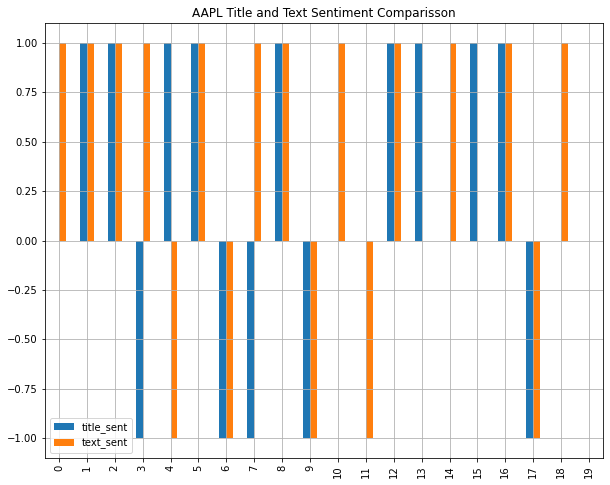

In [89]:
# Analyzing Sentiment Results via Plot
AAPL_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AAPL Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [92]:
AAPL_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.022310,0.094950,0.829900,0.075150,0.200000,0.154295,0.074900,0.884150,0.040850,0.350000
std,0.394675,0.119843,0.138565,0.136311,0.833509,0.352534,0.059087,0.085459,0.052413,0.875094
min,-0.743000,0.000000,0.559000,0.000000,-1.000000,-0.557400,0.000000,0.647000,0.000000,-1.000000
25%,-0.050575,0.000000,0.719500,0.000000,-0.250000,-0.025675,0.049500,0.815500,0.000000,-0.250000
50%,0.000000,0.000000,0.820000,0.000000,0.000000,0.249150,0.067500,0.920500,0.000000,1.000000
75%,0.345300,0.205250,1.000000,0.082500,1.000000,0.376275,0.086250,0.937000,0.065500,1.000000
max,0.612400,0.310000,1.000000,0.441000,1.000000,0.690800,0.221000,1.000000,0.145000,1.000000


In [93]:
# Fetch news about the FB stocks in 2021 in English
FB_news_en = newsapi.get_everything(
    q="FB",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
FB_news_en["totalResults"]

370

In [94]:
 # Creating a DataFrame with all the stocks news
FB_df = create_df(FB_news_en["articles"])
FB_df.head()

,date,title,description,text
0,2021-03-19T02:48:03Z,Mark Zuckerberg says him 'smoking meats' is hi...,Summary List PlacementMark Zuckerberg has been...,Mark Zuckerberg has been the subject of countl...
1,2021-03-23T16:25:01Z,"The CEOs of Google, Facebook, and Twitter will...",Summary List PlacementTech's biggest figures w...,Tech's biggest figures will once again appear ...
2,2021-03-19T14:01:32Z,Young female Japanese biker is 50-year-old man...,Can't trust everything you see online these days.,There exists this Twitter account: azusagakuyu...
3,2021-03-19T06:59:00Z,Instagram For Kids? Facebook Said To Be Eyeing...,<ol><li>Instagram For Kids? Facebook Said To B...,Facebook Inc’s (NASDAQ: FB) social media app I...
4,2021-03-23T17:18:00Z,: Facebook Founder Mark Zuckerberg raised near...,"Mark Zuckerberg, founder, chairman and chief e...","Mark Zuckerberg, founder, chairman and chief e..."


In [95]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in FB_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
FB_sent_df = FB_df.join(title_sentiment_df).join(text_sentiment_df)

FB_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-19T02:48:03Z,Mark Zuckerberg says him 'smoking meats' is hi...,Summary List PlacementMark Zuckerberg has been...,Mark Zuckerberg has been the subject of countl...,0.4588,0.2,0.800,0.000,1,0.0000,0.000,1.000,0.000,0
1,2021-03-23T16:25:01Z,"The CEOs of Google, Facebook, and Twitter will...",Summary List PlacementTech's biggest figures w...,Tech's biggest figures will once again appear ...,-0.3182,0.0,0.913,0.087,-1,-0.1027,0.000,0.958,0.042,-1
2,2021-03-19T14:01:32Z,Young female Japanese biker is 50-year-old man...,Can't trust everything you see online these days.,There exists this Twitter account: azusagakuyu...,0.0000,0.0,1.000,0.000,0,0.3612,0.075,0.925,0.000,1
3,2021-03-19T06:59:00Z,Instagram For Kids? Facebook Said To Be Eyeing...,<ol><li>Instagram For Kids? Facebook Said To B...,Facebook Inc’s (NASDAQ: FB) social media app I...,0.0000,0.0,1.000,0.000,0,0.4767,0.081,0.919,0.000,1
4,2021-03-23T17:18:00Z,: Facebook Founder Mark Zuckerberg raised near...,"Mark Zuckerberg, founder, chairman and chief e...","Mark Zuckerberg, founder, chairman and chief e...",0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0


<AxesSubplot:title={'center':'FB Title and Text Sentiment Comparisson'}>

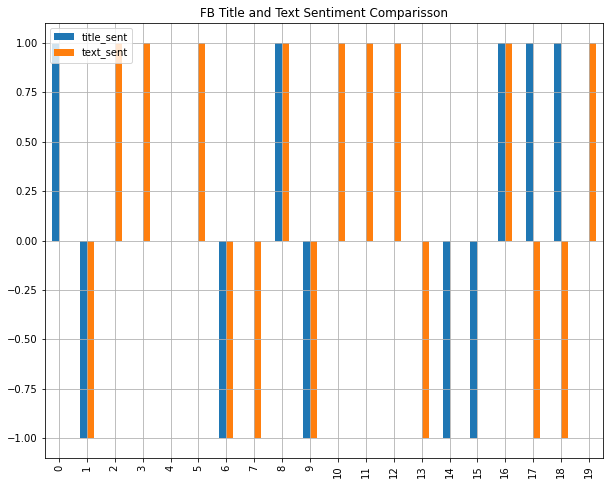

In [96]:
# Analyzing Sentiment Results via Plot
FB_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="FB Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [97]:
FB_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,-0.000550,0.058200,0.873250,0.068550,0.000000,0.145300,0.071400,0.884900,0.043700,0.10000
std,0.384293,0.110925,0.155728,0.130535,0.725476,0.487987,0.081208,0.092652,0.076481,0.91191
min,-0.778300,0.000000,0.507000,0.000000,-1.000000,-0.904200,0.000000,0.681000,0.000000,-1.00000
25%,-0.067050,0.000000,0.754000,0.000000,-0.250000,-0.151025,0.000000,0.813750,0.000000,-1.00000
50%,0.000000,0.000000,0.956500,0.000000,0.000000,0.000000,0.062000,0.916500,0.000000,0.00000
75%,0.074000,0.027000,1.000000,0.100000,0.250000,0.513750,0.133750,0.940000,0.071500,1.00000
max,0.706300,0.328000,1.000000,0.493000,1.000000,0.844200,0.227000,1.000000,0.319000,1.00000


In [98]:
# Fetch news about the UPST stocks in 2021 in English
UPST_news_en = newsapi.get_everything(
    q="UPST",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
UPST_news_en["totalResults"]

21

In [99]:
 # Creating a DataFrame with all the stocks news
UPST_df = create_df(UPST_news_en["articles"])
UPST_df.head()

,date,title,description,text
0,2021-03-18T03:00:39Z,"Upstart Holdings, Inc. (UPST) Q4 2020 Earnings...",UPST earnings call for the period ending Decem...,Image source: The Motley Fool.\r\nUpstart Hold...
1,2021-03-22T18:05:00Z,What's Happening With UPST Stock And ROKU Stoc...,One of the most common questions traders have ...,Commodity prices have historically run in cycl...
2,2021-03-18T21:37:09Z,Why Upstart Holdings (UPST) Soared 89% Today -...,<ol><li>Why Upstart Holdings (UPST) Soared 89%...,"(Bloomberg) -- In early 2019, industrialist Sa..."
3,2021-03-18T17:55:15Z,Wall Street Roundup: Bullish & Bearish Calls O...,"With continued volatility in the stock market,...","With continued volatility in the stock market,..."
4,2021-03-18T01:33:36Z,Dow Jones Futures: Dovish Fed Shores Up Stock ...,Dow Jones futures: A dovish Fed chief Powell g...,Dow Jones futures rose modestly late Wednesday...


In [100]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in UPST_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
UPST_sent_df = UPST_df.join(title_sentiment_df).join(text_sentiment_df)

UPST_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-18T03:00:39Z,"Upstart Holdings, Inc. (UPST) Q4 2020 Earnings...",UPST earnings call for the period ending Decem...,Image source: The Motley Fool.\r\nUpstart Hold...,0.0,0.0,1.0,0.0,0,-0.4404,0.000,0.892,0.108,-1
1,2021-03-22T18:05:00Z,What's Happening With UPST Stock And ROKU Stoc...,One of the most common questions traders have ...,Commodity prices have historically run in cycl...,0.0,0.0,1.0,0.0,0,0.5423,0.123,0.877,0.000,1
2,2021-03-18T21:37:09Z,Why Upstart Holdings (UPST) Soared 89% Today -...,<ol><li>Why Upstart Holdings (UPST) Soared 89%...,"(Bloomberg) -- In early 2019, industrialist Sa...",0.0,0.0,1.0,0.0,0,0.6908,0.147,0.853,0.000,1
3,2021-03-18T17:55:15Z,Wall Street Roundup: Bullish & Bearish Calls O...,"With continued volatility in the stock market,...","With continued volatility in the stock market,...",0.0,0.0,1.0,0.0,0,0.4588,0.079,0.921,0.000,1
4,2021-03-18T01:33:36Z,Dow Jones Futures: Dovish Fed Shores Up Stock ...,Dow Jones futures: A dovish Fed chief Powell g...,Dow Jones futures rose modestly late Wednesday...,0.0,0.0,1.0,0.0,0,0.4019,0.078,0.922,0.000,1


<AxesSubplot:title={'center':'UPST Title and Text Sentiment Comparisson'}>

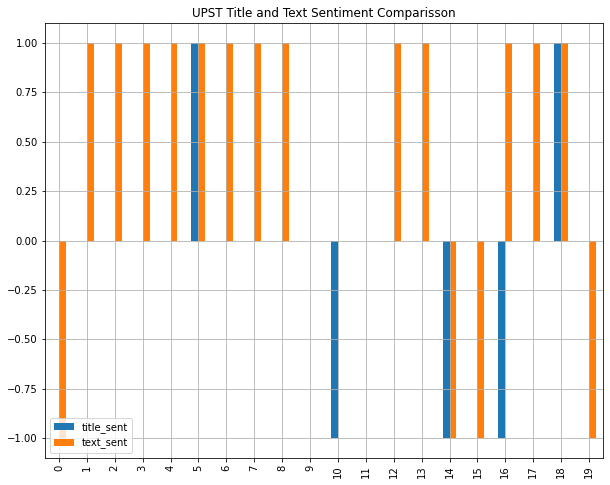

In [101]:
# Analyzing Sentiment Results via Plot
UPST_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="UPST Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [102]:
UPST_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.011025,0.034900,0.921750,0.043350,-0.050000,0.258730,0.086850,0.884100,0.029000,0.450000
std,0.164725,0.091609,0.156563,0.093012,0.510418,0.437632,0.075844,0.077961,0.051546,0.825578
min,-0.526700,0.000000,0.423000,0.000000,-1.000000,-0.726900,0.000000,0.706000,0.000000,-1.000000
25%,0.000000,0.000000,0.955500,0.000000,0.000000,0.000000,0.000000,0.832500,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.411700,0.093000,0.891000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.639825,0.151250,0.930250,0.046500,1.000000
max,0.381800,0.352000,1.000000,0.298000,1.000000,0.750600,0.208000,1.000000,0.169000,1.000000


In [103]:
# Fetch news about the AMZN stocks in 2021 in English
AMZN_news_en = newsapi.get_everything(
    q="AMZN",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
AMZN_news_en["totalResults"]

339

In [104]:
 # Creating a DataFrame with all the stocks news
AMZN_df = create_df(AMZN_news_en["articles"])
AMZN_df.head()

,date,title,description,text
0,2021-03-23T21:33:43Z,Amazon is battling a union push in Alabama. He...,Summary List PlacementBetween now and March 30...,"Between now and March 30, roughly 6,000 Amazon..."
1,2021-03-22T20:13:00Z,Amazon is using new AI-powered cameras in deli...,"Summary List PlacementIn February, The Informa...","In February, The Information reported on an in..."
2,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...
3,2021-03-18T20:02:12Z,Amazon's Asian employee group asks for 'explic...,Summary List PlacementAmazon's internal affini...,Amazon's internal affinity group representing ...
4,2021-03-17T19:51:00Z,: Unity poaches Palo Alto Networks CFO,Palo Alto Networks Inc.'s chief financial offi...,Palo Alto Networks Inc.s chief financial offic...


In [105]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AMZN_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AMZN_sent_df = AMZN_df.join(title_sentiment_df).join(text_sentiment_df)

AMZN_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-23T21:33:43Z,Amazon is battling a union push in Alabama. He...,Summary List PlacementBetween now and March 30...,"Between now and March 30, roughly 6,000 Amazon...",-0.1027,0.101,0.774,0.125,-1,0.0516,0.093,0.847,0.06,1
1,2021-03-22T20:13:00Z,Amazon is using new AI-powered cameras in deli...,"Summary List PlacementIn February, The Informa...","In February, The Information reported on an in...",0.1779,0.082,0.918,0.000,1,0.1779,0.057,0.943,0.00,1
2,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...,-0.3400,0.000,0.888,0.112,-1,0.0000,0.000,1.000,0.00,0
3,2021-03-18T20:02:12Z,Amazon's Asian employee group asks for 'explic...,Summary List PlacementAmazon's internal affini...,Amazon's internal affinity group representing ...,0.4019,0.109,0.891,0.000,1,0.6369,0.157,0.843,0.00,1
4,2021-03-17T19:51:00Z,: Unity poaches Palo Alto Networks CFO,Palo Alto Networks Inc.'s chief financial offi...,Palo Alto Networks Inc.s chief financial offic...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.00,0


<AxesSubplot:title={'center':'AMZN Title and Text Sentiment Comparisson'}>

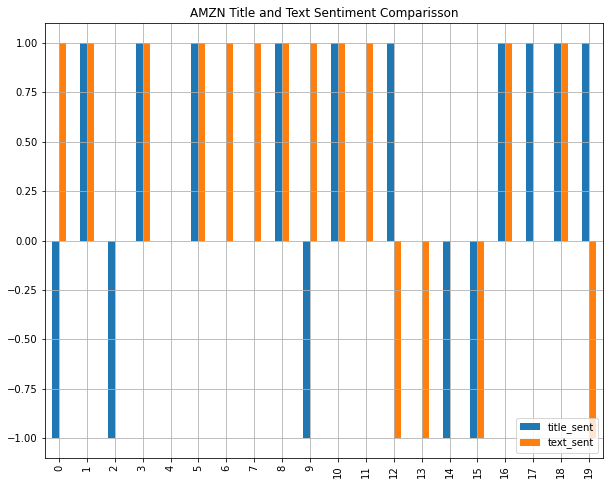

In [106]:
# Analyzing Sentiment Results via Plot
AMZN_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AMZN Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [107]:
AMZN_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.051890,0.106750,0.842150,0.051100,0.250000,0.154650,0.078650,0.881950,0.039400,0.400000
std,0.328038,0.106786,0.115506,0.097953,0.850696,0.472932,0.077985,0.093633,0.067835,0.820783
min,-0.636900,0.000000,0.631000,0.000000,-1.000000,-0.735100,0.000000,0.647000,0.000000,-1.000000
25%,-0.025675,0.000000,0.753500,0.000000,-0.250000,0.000000,0.000000,0.841750,0.000000,0.000000
50%,0.088950,0.092000,0.809500,0.000000,0.500000,0.177900,0.059500,0.879000,0.000000,1.000000
75%,0.261500,0.197750,0.938500,0.028000,1.000000,0.574275,0.132750,0.944250,0.064000,1.000000
max,0.599400,0.302000,1.000000,0.286000,1.000000,0.726900,0.238000,1.000000,0.205000,1.000000


In [108]:
# Fetch news about the GME stocks in 2021 in English
GME_news_en = newsapi.get_everything(
    q="GME",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
GME_news_en["totalResults"]

146

In [109]:
 # Creating a DataFrame with all the stocks news
GME_df = create_df(GME_news_en["articles"])
GME_df.head()

,date,title,description,text
0,2021-03-22T15:00:41Z,"Reddit ""apes"" support gorilla conservation","Some Reddit 'apes,' who apparently lack 'diamo...","""Apes Together Strong"" is a popular saying in ..."
1,2021-03-18T16:55:11Z,Vanda Research's retail-investor tracker naile...,Summary List PlacementPresident Joe Biden's $1...,"President Joe Biden's $1,400 stimulus checks a..."
2,2021-03-17T06:37:00Z,WallStreetBets Users Are Adopting Gorillas Wit...,"In January this year, the WallStreetBets subre...","In January this year, the WallStreetBets subre..."
3,2021-03-17T15:22:00Z,Capitol Report: Robinhood business model under...,Democrats took aim at aspects of zero-commissi...,Democrats took aim at aspects of zero-commissi...
4,2021-03-23T14:39:46Z,GameStop CCO Resigns Ahead Of Q4 Earnings Report,GameStop Corp. (NYSE: GME) shares traded lower...,Police say 21-year-old man charged with 10 mur...


In [110]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in GME_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
GME_sent_df = GME_df.join(title_sentiment_df).join(text_sentiment_df)

GME_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-22T15:00:41Z,"Reddit ""apes"" support gorilla conservation","Some Reddit 'apes,' who apparently lack 'diamo...","""Apes Together Strong"" is a popular saying in ...",0.4019,0.403,0.597,0.000,1,0.6597,0.170,0.782,0.047,1
1,2021-03-18T16:55:11Z,Vanda Research's retail-investor tracker naile...,Summary List PlacementPresident Joe Biden's $1...,"President Joe Biden's $1,400 stimulus checks a...",0.0000,0.000,1.000,0.000,0,0.3612,0.070,0.930,0.000,1
2,2021-03-17T06:37:00Z,WallStreetBets Users Are Adopting Gorillas Wit...,"In January this year, the WallStreetBets subre...","In January this year, the WallStreetBets subre...",0.3400,0.231,0.769,0.000,1,0.6202,0.168,0.832,0.000,1
3,2021-03-17T15:22:00Z,Capitol Report: Robinhood business model under...,Democrats took aim at aspects of zero-commissi...,Democrats took aim at aspects of zero-commissi...,-0.3400,0.000,0.821,0.179,-1,0.0000,0.000,1.000,0.000,0
4,2021-03-23T14:39:46Z,GameStop CCO Resigns Ahead Of Q4 Earnings Report,GameStop Corp. (NYSE: GME) shares traded lower...,Police say 21-year-old man charged with 10 mur...,-0.3182,0.000,0.753,0.247,-1,-0.9246,0.000,0.668,0.332,-1


<AxesSubplot:title={'center':'GME Title and Text Sentiment Comparisson'}>

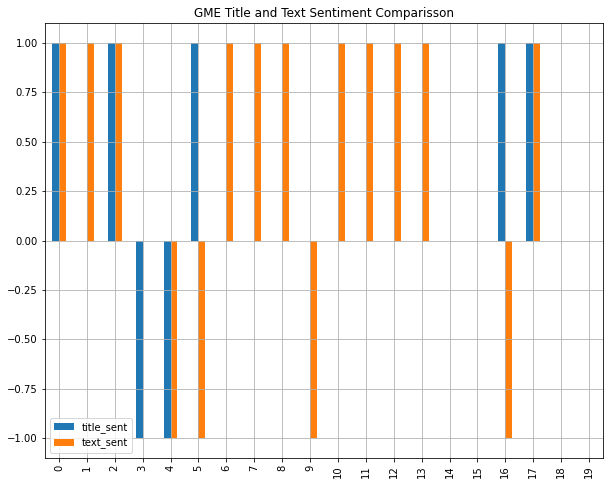

In [111]:
# Analyzing Sentiment Results via Plot
GME_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="GME Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [112]:
GME_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.034885,0.055950,0.922750,0.021300,0.150000,0.153025,0.080500,0.863400,0.056000,0.350000
std,0.180122,0.111167,0.119453,0.066482,0.587143,0.449572,0.063997,0.086467,0.080281,0.812728
min,-0.340000,0.000000,0.597000,0.000000,-1.000000,-0.924600,0.000000,0.668000,0.000000,-1.000000
25%,0.000000,0.000000,0.825500,0.000000,0.000000,0.000000,0.000000,0.815250,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.179750,0.084500,0.855500,0.047000,1.000000
75%,0.029475,0.029250,1.000000,0.000000,0.250000,0.504000,0.141250,0.909750,0.068000,1.000000
max,0.401900,0.403000,1.000000,0.247000,1.000000,0.659700,0.170000,1.000000,0.332000,1.000000


In [113]:
# Fetch news about the TKAT stocks in 2021 in English
TKAT_news_en = newsapi.get_everything(
    q="TKAT",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
TKAT_news_en["totalResults"]

9

In [114]:
 # Creating a DataFrame with all the stocks news
TKAT_df = create_df(TKAT_news_en["articles"])
TKAT_df.head()

,date,title,description,text
0,2021-03-18T19:02:28Z,"Why NFT Speculation Has Shares of Takung Art, ...",Investors seem to be speculating that these co...,What happened\r\nShares of Jiayin Group (NASDA...
1,2021-03-18T11:02:00Z,"Takung Art, Sino-Global Higher on Crypto-Relat...",Takung Art jumped amid talk the Chinese-based ...,Shares of Takung Art (TKAT) - Get Report leap...
2,2021-03-17T16:42:37Z,"LPCN, SGLB, NRG and CHFS among midday movers",Gainers:Takung Art (TKAT) +122%. Zhongchao (ZC...,<ul><li>Gainers:&nbsp;Takung Art (NYSEMKT:TKAT...
3,2021-03-22T12:24:26Z,"Banco Bilbao Vizcaya Argentaria, RLX Technolog...",RLX Technology (RLX) -40%.Takung Art (TKAT) -1...,<ul><li>RLX Technology (NYSE:RLX) -40%\r\n.</l...
4,2021-03-16T16:41:10Z,"SVRA, ZYNE, CANF and CLSK among midday movers",Gainers: SunLink Health Systems (SSY) +219%.Ca...,<ul><li>Gainers:&nbsp;SunLink Health Systems (...


In [115]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TKAT_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TKAT_sent_df = TKAT_df.join(title_sentiment_df).join(text_sentiment_df)

TKAT_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-18T19:02:28Z,"Why NFT Speculation Has Shares of Takung Art, ...",Investors seem to be speculating that these co...,What happened\r\nShares of Jiayin Group (NASDA...,0.7845,0.345,0.655,0.000,1,0.7845,0.203,0.797,0.0,1
1,2021-03-18T11:02:00Z,"Takung Art, Sino-Global Higher on Crypto-Relat...",Takung Art jumped amid talk the Chinese-based ...,Shares of Takung Art (TKAT) - Get Report leap...,0.0000,0.000,1.000,0.000,0,0.5267,0.124,0.876,0.0,1
2,2021-03-17T16:42:37Z,"LPCN, SGLB, NRG and CHFS among midday movers",Gainers:Takung Art (TKAT) +122%. Zhongchao (ZC...,<ul><li>Gainers:&nbsp;Takung Art (NYSEMKT:TKAT...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.0,0
3,2021-03-22T12:24:26Z,"Banco Bilbao Vizcaya Argentaria, RLX Technolog...",RLX Technology (RLX) -40%.Takung Art (TKAT) -1...,<ul><li>RLX Technology (NYSE:RLX) -40%\r\n.</l...,-0.5267,0.000,0.726,0.274,-1,0.0000,0.000,1.000,0.0,0
4,2021-03-16T16:41:10Z,"SVRA, ZYNE, CANF and CLSK among midday movers",Gainers: SunLink Health Systems (SSY) +219%.Ca...,<ul><li>Gainers:&nbsp;SunLink Health Systems (...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.0,0


<AxesSubplot:title={'center':'TKAT Title and Text Sentiment Comparisson'}>

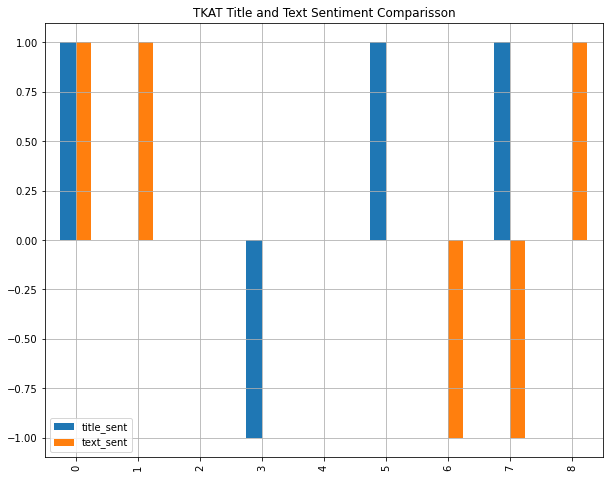

In [116]:
# Analyzing Sentiment Results via Plot
TKAT_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TKAT Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [117]:
TKAT_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.124411,0.079667,0.889889,0.030444,0.222222,0.094744,0.041889,0.942111,0.016000,0.111111
std,0.375027,0.128091,0.138895,0.091333,0.666667,0.361631,0.073564,0.070085,0.031753,0.781736
min,-0.526700,0.000000,0.655000,0.000000,-1.000000,-0.318200,0.000000,0.797000,0.000000,-1.000000
25%,0.000000,0.000000,0.805000,0.000000,0.000000,0.000000,0.000000,0.927000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.000000
75%,0.421500,0.177000,1.000000,0.000000,1.000000,0.177900,0.050000,1.000000,0.000000,1.000000
max,0.784500,0.345000,1.000000,0.274000,1.000000,0.784500,0.203000,1.000000,0.073000,1.000000


In [118]:
# Fetch news about the LIFE stocks in 2021 in English
LIFE_news_en = newsapi.get_everything(
    q="LIFE",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
LIFE_news_en["totalResults"]

48253

In [119]:
 # Creating a DataFrame with all the stocks news
LIFE_df = create_df(LIFE_news_en["articles"])
LIFE_df.head()

,date,title,description,text
0,2021-03-19T12:00:26Z,Modder brings the world of Bioshock to 'Half-L...,While you patiently wait for the next BioSchoc...,While you patiently wait for the next BioSchoc...
1,2021-03-18T18:06:48Z,GeForce Now doubles its price for newcomers to...,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...
2,2021-03-15T10:00:06Z,Life After the Vaccine in Israel,"Half the country has been inoculated, ushering...",Isabel Kershner contributed reporting.\r\nThe ...
3,2021-03-20T04:43:56Z,Australia warned of 'life threatening' flash f...,"Dozens of people are rescued from floodwaters,...",image captionUp to 100mm (four inches) of rain...
4,2021-03-15T13:00:00Z,Welcome to Lodge,"Welcome to Lodge, Lifehacker’s newest section ...","Welcome to Lodge, Lifehackers newest section e..."


In [120]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in LIFE_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
LIFE_sent_df = LIFE_df.join(title_sentiment_df).join(text_sentiment_df)

LIFE_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-19T12:00:26Z,Modder brings the world of Bioshock to 'Half-L...,While you patiently wait for the next BioSchoc...,While you patiently wait for the next BioSchoc...,0.0000,0.0,1.000,0.000,0,0.1531,0.049,0.951,0.000,1
1,2021-03-18T18:06:48Z,GeForce Now doubles its price for newcomers to...,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,2021-03-15T10:00:06Z,Life After the Vaccine in Israel,"Half the country has been inoculated, ushering...",Isabel Kershner contributed reporting.\r\nThe ...,0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
3,2021-03-20T04:43:56Z,Australia warned of 'life threatening' flash f...,"Dozens of people are rescued from floodwaters,...",image captionUp to 100mm (four inches) of rain...,-0.6705,0.0,0.476,0.524,-1,-0.8126,0.000,0.781,0.219,-1
4,2021-03-15T13:00:00Z,Welcome to Lodge,"Welcome to Lodge, Lifehacker’s newest section ...","Welcome to Lodge, Lifehackers newest section e...",0.4588,0.6,0.400,0.000,1,0.8205,0.186,0.814,0.000,1


<AxesSubplot:title={'center':'LIFE Title and Text Sentiment Comparisson'}>

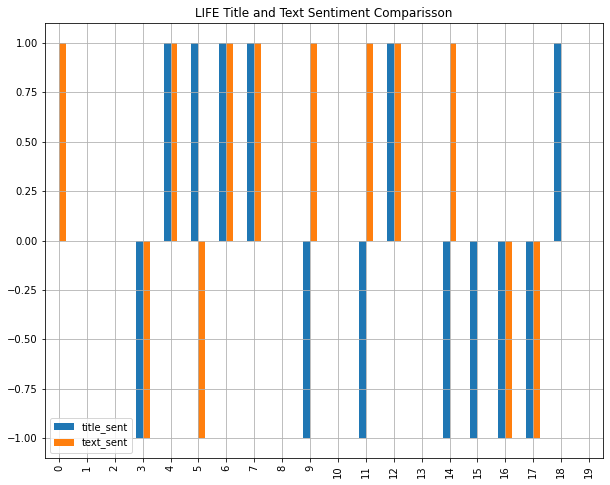

In [121]:
# Analyzing Sentiment Results via Plot
LIFE_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="LIFE Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [122]:
LIFE_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.008610,0.111800,0.778950,0.109200,-0.050000,0.069295,0.050150,0.915250,0.034550,0.200000
std,0.419597,0.179298,0.209042,0.183881,0.825578,0.447422,0.069103,0.081935,0.063763,0.767772
min,-0.840200,0.000000,0.400000,0.000000,-1.000000,-0.812600,0.000000,0.779000,0.000000,-1.000000
25%,-0.245000,0.000000,0.631500,0.000000,-1.000000,-0.007625,0.000000,0.840000,0.000000,0.000000
50%,0.000000,0.000000,0.804500,0.000000,0.000000,0.000000,0.017500,0.934500,0.000000,0.000000
75%,0.289900,0.177750,1.000000,0.158750,1.000000,0.278900,0.067000,1.000000,0.051500,1.000000
max,0.726900,0.600000,1.000000,0.600000,1.000000,0.844200,0.221000,1.000000,0.219000,1.000000


In [123]:
# Fetch news about the PLUG stocks in 2021 in English
PLUG_news_en = newsapi.get_everything(
    q="PLUG",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
PLUG_news_en["totalResults"]

2615

In [124]:
 # Creating a DataFrame with all the stocks news
PLUG_df = create_df(PLUG_news_en["articles"])
PLUG_df.head()

,date,title,description,text
0,2021-03-22T21:11:27Z,This USB-C gadget from hell brings back the wo...,Engineer Pim de Groot has built a truly cursed...,Photo: Pim de Groot (@mifune) / Twitter\r\n\n ...
1,2021-03-20T03:50:43Z,Tablo rolls out a $200 quad-tuner DVR with HDMI,This $200 DVR can record up to four programs a...,For cord-cutters who don't get all of their TV...
2,2021-03-15T16:43:46Z,Apple pulls the plug on the HomePod,"""We are focusing our efforts on HomePod mini,""...",1 with 1 posters participating\r\n<ul><li>\r\n...
3,2021-03-17T16:30:00Z,How to Transfer Your Signal Message History Be...,Signal is testing a new wifi transfer tool for...,Signal is testing a new wifi transfer tool for...
4,2021-03-22T14:00:00Z,Try This iOS 14.5 Option to Get Your Security ...,"iOS 14.5 should be right around the corner, ju...","iOS 14.5 should be right around the corner, ju..."


In [125]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in PLUG_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
PLUG_sent_df = PLUG_df.join(title_sentiment_df).join(text_sentiment_df)

PLUG_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-22T21:11:27Z,This USB-C gadget from hell brings back the wo...,Engineer Pim de Groot has built a truly cursed...,Photo: Pim de Groot (@mifune) / Twitter\r\n\n ...,-0.8658,0.000,0.535,0.465,-1,-0.4172,0.050,0.810,0.14,-1
1,2021-03-20T03:50:43Z,Tablo rolls out a $200 quad-tuner DVR with HDMI,This $200 DVR can record up to four programs a...,For cord-cutters who don't get all of their TV...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.00,0
2,2021-03-15T16:43:46Z,Apple pulls the plug on the HomePod,"""We are focusing our efforts on HomePod mini,""...",1 with 1 posters participating\r\n<ul><li>\r\n...,0.0000,0.000,1.000,0.000,0,0.2732,0.070,0.930,0.00,1
3,2021-03-17T16:30:00Z,How to Transfer Your Signal Message History Be...,Signal is testing a new wifi transfer tool for...,Signal is testing a new wifi transfer tool for...,0.0000,0.000,1.000,0.000,0,0.3612,0.068,0.932,0.00,1
4,2021-03-22T14:00:00Z,Try This iOS 14.5 Option to Get Your Security ...,"iOS 14.5 should be right around the corner, ju...","iOS 14.5 should be right around the corner, ju...",0.3400,0.194,0.806,0.000,1,0.0000,0.000,1.000,0.00,0


<AxesSubplot:title={'center':'PLUG Title and Text Sentiment Comparisson'}>

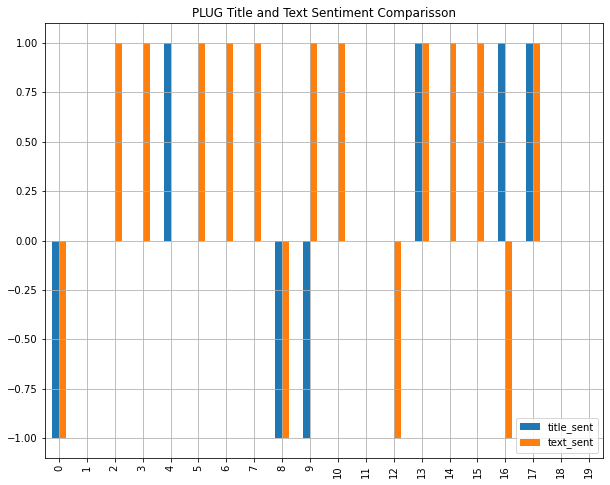

In [126]:
# Analyzing Sentiment Results via Plot
PLUG_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="PLUG Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [127]:
PLUG_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.012890,0.06940,0.883550,0.047050,0.050000,0.269095,0.095650,0.872500,0.031800,0.350000
std,0.314227,0.14179,0.186059,0.123281,0.604805,0.413639,0.086594,0.102257,0.046758,0.812728
min,-0.865800,0.00000,0.476000,0.000000,-1.000000,-0.417200,0.000000,0.680000,0.000000,-1.000000
25%,0.000000,0.00000,0.805500,0.000000,0.000000,0.000000,0.000000,0.809500,0.000000,0.000000
50%,0.000000,0.00000,1.000000,0.000000,0.000000,0.317200,0.075500,0.846000,0.000000,1.000000
75%,0.000000,0.03500,1.000000,0.000000,0.000000,0.670500,0.165750,0.960250,0.054000,1.000000
max,0.765000,0.52400,1.000000,0.465000,1.000000,0.908100,0.285000,1.000000,0.140000,1.000000


In [128]:
# Fetch news about the PLUG stocks in 2021 in English
BOX_news_en = newsapi.get_everything(
    q="BOX",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
BOX_news_en["totalResults"]

10897

In [129]:
 # Creating a DataFrame with all the stocks news
BOX_df = create_df(BOX_news_en["articles"])
BOX_df.head()

,date,title,description,text
0,2021-03-22T20:47:03Z,Box shares rise on report company is exploring...,"Shares of Box, a well-known content-and-collab...","Shares of Box, a well-known content-and-collab..."
1,2021-03-22T11:45:04Z,The Morning After: Brazil wants in-box charger...,Apple is fined in Brazil for selling iPhones w...,Getting rid of smartphone excess is hard. Just...
2,2021-03-17T09:00:21Z,Artifacts of the Lost Year,"A fake fur box from Prada, a wood glider from ...","Netflix, email, Zoom its all in one place, so ..."
3,2021-03-17T10:00:08Z,Why Shop at a Specialty Nursery?,"If you buy all your plants at a big-box store,...","Among many botanical relationships, Mr. Bowen ..."
4,2021-03-16T15:59:24Z,Get feedback on your pitch deck from tech lead...,The importance of the pitch deck can’t be unde...,The importance of the pitch deck cant be under...


In [130]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in BOX_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
BOX_sent_df = BOX_df.join(title_sentiment_df).join(text_sentiment_df)

BOX_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-03-22T20:47:03Z,Box shares rise on report company is exploring...,"Shares of Box, a well-known content-and-collab...","Shares of Box, a well-known content-and-collab...",0.2960,0.216,0.784,0.000,1,0.2960,0.075,0.925,0.000,1
1,2021-03-22T11:45:04Z,The Morning After: Brazil wants in-box charger...,Apple is fined in Brazil for selling iPhones w...,Getting rid of smartphone excess is hard. Just...,0.0000,0.000,1.000,0.000,0,0.0258,0.041,0.921,0.038,0
2,2021-03-17T09:00:21Z,Artifacts of the Lost Year,"A fake fur box from Prada, a wood glider from ...","Netflix, email, Zoom its all in one place, so ...",-0.3182,0.000,0.635,0.365,-1,-0.3586,0.033,0.900,0.068,-1
3,2021-03-17T10:00:08Z,Why Shop at a Specialty Nursery?,"If you buy all your plants at a big-box store,...","Among many botanical relationships, Mr. Bowen ...",0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
4,2021-03-16T15:59:24Z,Get feedback on your pitch deck from tech lead...,The importance of the pitch deck can’t be unde...,The importance of the pitch deck cant be under...,0.0000,0.000,1.000,0.000,0,0.2862,0.087,0.913,0.000,1


<AxesSubplot:title={'center':'BOX Title and Text Sentiment Comparisson'}>

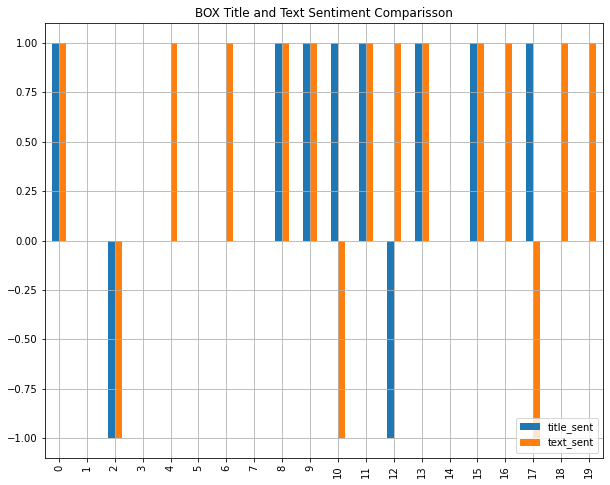

In [131]:
# Analyzing Sentiment Results via Plot
BOX_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BOX Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [132]:
BOX_sent_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.152600,0.116400,0.852700,0.030900,0.300000,0.232155,0.082400,0.890250,0.027400,0.450000
std,0.289353,0.155859,0.166728,0.088988,0.656947,0.411585,0.064576,0.086143,0.052184,0.759155
min,-0.318200,0.000000,0.504000,0.000000,-1.000000,-0.636900,0.000000,0.662000,0.000000,-1.000000
25%,0.000000,0.000000,0.707250,0.000000,0.000000,0.000000,0.024750,0.834250,0.000000,0.000000
50%,0.000000,0.000000,0.933500,0.000000,0.000000,0.291100,0.081000,0.906500,0.000000,1.000000
75%,0.301550,0.225000,1.000000,0.000000,1.000000,0.585900,0.128750,0.933250,0.042000,1.000000
max,0.709600,0.496000,1.000000,0.365000,1.000000,0.827100,0.199000,1.000000,0.217000,1.000000


# Getting news about specific stocks in Date Range February 19, 2021 to February 28, 2021

In [133]:
# Fetch news about the GME stocks in 2021 in English
GME_news_en = newsapi.get_everything(
    q="GME",
    from_param='2021-02-19',
    to='2021-02-28',
    language="en"
)

# Show the total number of news
GME_news_en["totalResults"]

NewsAPIException: {'status': 'error', 'code': 'parameterInvalid', 'message': 'You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2021-03-06, but you have requested 2021-02-19. You may need to upgrade to a paid plan.'}